In [37]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
current_directory = os.getcwd()
data_df = stock_df = pd.read_csv(current_directory + '/input/preprocessed_data.csv')

In [3]:
# Create train and test splits and scale the data.

X = data_df.drop(columns = ['is_fraud'])
y = data_df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Create function to represent the results.

def validatePredictions(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:\n', confusion)
    print('Classification Report:\n', classification_rep)

In [26]:
# Logistic Regression Classifier

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(X_test)
validatePredictions(y_test, logistic_regression_y_pred)

Accuracy: 0.9992
Confusion Matrix:
 [[1270834      70]
 [    985     635]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



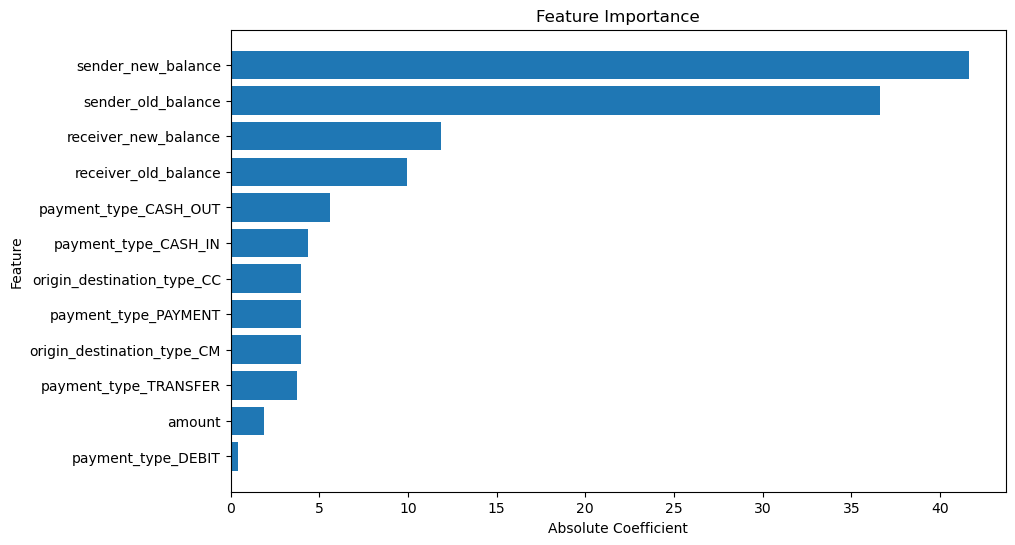

In [33]:
# Get the coefficients of the features
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature coefficients
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance_df['Absolute_Coefficient'] = abs(importance_df['Coefficient'])  # Use absolute values for sorting

# Sort the DataFrame by absolute coefficient value
importance_df = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print or display the feature importance
# Create the bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order of features for better visualization
plt.show()

In [6]:
# Random Forest Classifier

model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(X_train, y_train)
random_forest_y_pred = model.predict(X_test)
validatePredictions(y_test, random_forest_y_pred)

Accuracy: 0.9997
Confusion Matrix:
 [[1270853      51]
 [    339    1281]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [21]:
# Decision Tree Classifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)
validatePredictions(y_test, decision_tree_y_pred)

Accuracy: 0.9998
Confusion Matrix:
 [[1270758     146]
 [    156    1464]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.90      0.91      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



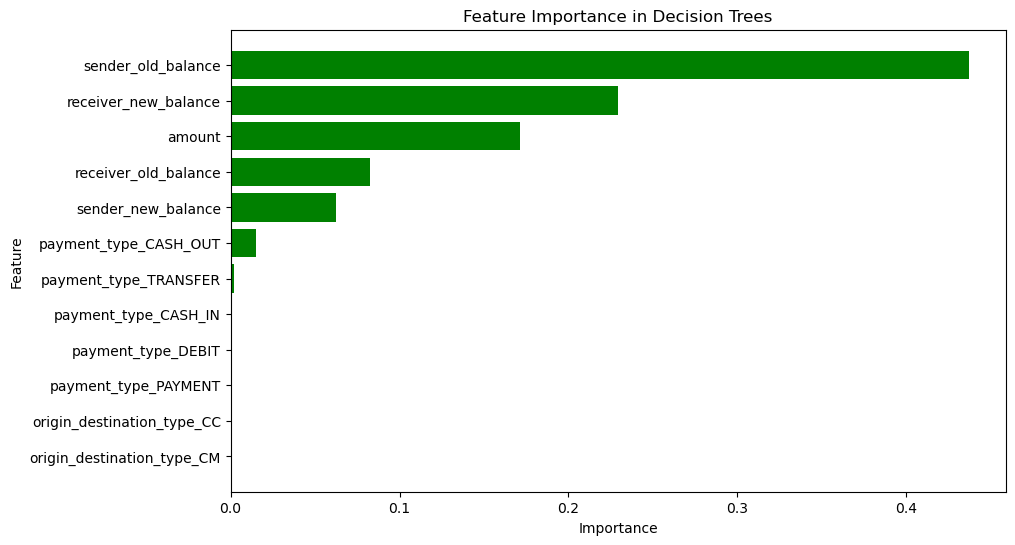

In [32]:
# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance
# Create the bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="green")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Trees')
plt.gca().invert_yaxis()  # Reverse the order of features for better visualization
plt.show()

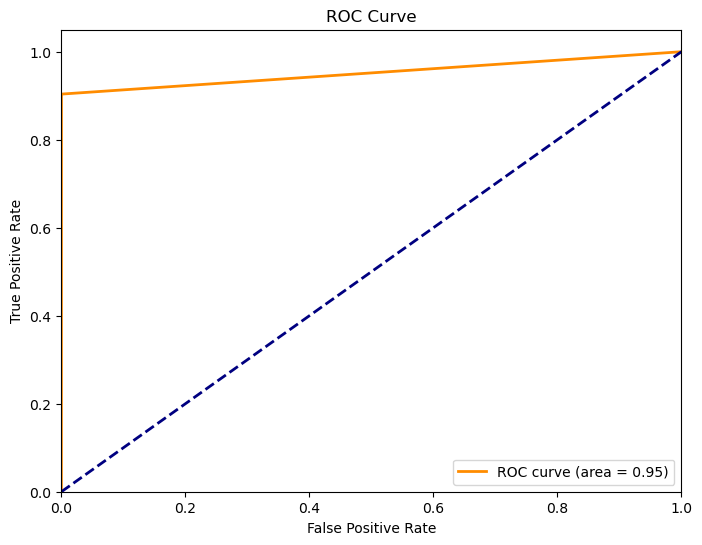

In [38]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Support Vectore Machines Classifier

model = SVC(kernel='linear', C=0.1, random_state=42)
model.fit(X_train, y_train)
support_vector_machine_y_pred = model.predict(X_test)
validatePredictions(y_test, support_vector_machine_y_pred)

Accuracy: 0.9991
Confusion Matrix:
 [[1270897       7]
 [   1162     458]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.28      0.44      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.64      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524



In [9]:
# K Nearest Neighbours Classifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
k_nearest_neighbours_y_pred = model.predict(X_test)
validatePredictions(y_test, k_nearest_neighbours_y_pred)

Accuracy: 0.9996
Confusion Matrix:
 [[1270805      99]
 [    417    1203]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.74      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [10]:
# Gaussian Naive Bayes Classifier

model = GaussianNB()
model.fit(X_train, y_train)
gaussian_naive_bayes_y_pred = model.predict(X_test)
validatePredictions(y_test, gaussian_naive_bayes_y_pred)

Accuracy: 0.5664
Confusion Matrix:
 [[719139 551765]
 [     0   1620]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.72   1270904
           1       0.00      1.00      0.01      1620

    accuracy                           0.57   1272524
   macro avg       0.50      0.78      0.36   1272524
weighted avg       1.00      0.57      0.72   1272524



In [11]:
# XGBoost Classifier

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train, y_train)
xgboost_y_pred = model.predict(X_test)
validatePredictions(y_test, xgboost_y_pred)

Accuracy: 0.9997
Confusion Matrix:
 [[1270841      63]
 [    356    1264]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.78      0.86      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [12]:
# AdaBoost Classifier

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
adaboost_y_pred = model.predict(X_test)
validatePredictions(y_test, adaboost_y_pred)

Accuracy: 0.9994
Confusion Matrix:
 [[1270789     115]
 [    687     933]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.58      0.70      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.79      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
# Create data frame with all model's predictions.

prediction_df = pd.DataFrame({
    'Logistic Regression': logistic_regression_y_pred,
    'Random Forest': random_forest_y_pred,
    'Decision Tree': decision_tree_y_pred,
    'Support Vector Machine': support_vector_machine_y_pred,
    'K-Nearest Neighbors': k_nearest_neighbours_y_pred,
    'Gaussian Naive Bayes': gaussian_naive_bayes_y_pred,
    'XGBoost': xgboost_y_pred,
    'AdaBoost': adaboost_y_pred
})

In [34]:
# Create model performance comparision table.

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision (Class 0)': [],
    'Recall (Class 0)': [],
    'F1-Score (Class 0)': [],
    'Precision (Class 1)': [],
    'Recall (Class 1)': [],
    'F1-Score (Class 1)': []
}

for model, y_pred in prediction_df.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_score_0 = f1_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_score_1 = f1_score(y_test, y_pred, pos_label=1)

    metrics['Model'].append(model)
    metrics['Accuracy'].append(round(accuracy, 4))
    metrics['Precision (Class 0)'].append(round(precision_0, 4))
    metrics['Recall (Class 0)'].append(round(recall_0, 4))
    metrics['F1-Score (Class 0)'].append(round(f1_score_0, 4))
    metrics['Precision (Class 1)'].append(round(precision_1, 4))
    metrics['Recall (Class 1)'].append(round(recall_1, 4))
    metrics['F1-Score (Class 1)'].append(round(f1_score_1, 4))

metrics_df = pd.DataFrame(metrics)

metrics_df = metrics_df.sort_values(by="Recall (Class 1)", ascending=False)

metrics_df

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
5,Gaussian Naive Bayes,0.5664,1.0000,0.5658,0.7227,0.0029,1.0000,0.0058
2,Decision Tree,0.9998,0.9999,0.9999,0.9999,0.9093,0.9037,0.9065
1,Random Forest,0.9997,0.9997,1.0000,0.9998,0.9617,0.7907,0.8679
6,XGBoost,0.9997,0.9997,1.0000,0.9998,0.9525,0.7802,0.8578
4,K-Nearest Neighbors,0.9996,0.9997,0.9999,0.9998,0.9240,0.7426,0.8234
7,AdaBoost,0.9994,0.9995,0.9999,0.9997,0.8903,0.5759,0.6994
0,Logistic Regression,0.9992,0.9992,0.9999,0.9996,0.9007,0.3920,0.5462
3,Support Vector Machine,0.9991,0.9991,1.0000,0.9995,0.9849,0.2827,0.4393


In [20]:
processed_file_path = current_directory + '/output/model_metrics.csv'
metrics_df.to_csv(processed_file_path, index=False)